In [101]:
!pip3 install pandas
import pandas as pd
!pip3 install pymystem3
!pip3 install nltk
!pip3 install wordcloud
from pymystem3 import Mystem
m = Mystem()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
# загружаем нужный список стоп-слов
sw = stopwords.words('russian')

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
!pip3 install Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [77]:
!pip3 install gensim
import gensim

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


# Анализ данных

In [102]:
my_file = pd.read_csv("ingredients_from_eda.ru.csv")
my_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159675 entries, 0 to 1159674
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   id          1159675 non-null  int64 
 1   ingredient  1159675 non-null  object
 2   amount      1159675 non-null  object
 3   name        1159675 non-null  object
 4   type        1159675 non-null  object
 5   page        1159675 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 53.1+ MB


In [103]:
my_file.head()

,id,ingredient,amount,name,type,page
0,13411,Вода,1 л,kapusta-po-gruzinski-137009,zagotovki,1
1,13410,Сахар,90 г,kapusta-po-gruzinski-137009,zagotovki,1
2,13421,Соль,12 г,kapusta-po-gruzinski-137009,zagotovki,1
3,14585,Уксус 9%-ный,250 мл,kapusta-po-gruzinski-137009,zagotovki,1
4,13436,Белокочанная капуста,1 штука,kapusta-po-gruzinski-137009,zagotovki,1


In [4]:
my_file['type'].value_counts()

osnovnye-blyuda     482951
salaty              243764
supy                183055
zavtraki             72089
pasta-picca          53559
sousy-marinady       51319
vypechka-deserty     39165
sendvichi            27816
bulony                3777
zagotovki             1151
zakuski               1029
Name: type, dtype: int64

In [67]:
my_file.groupby("name").agg({"ingredient": set})

,ingredient
name,
-italyanskiy-rybnyy-sup-kachchukka--138643,"{Яйцо куриное, Лавровый лист, Ракушки-венерки ..."
-ravioli-s-tvorogom-i-grushey-137788,"{Яйцо куриное, Орехи, Филе сельди, Томатный со..."
-sup-iz-tykvy-s-sokom-layma-25229,"{Яйцо куриное, Рыжики, Белое сухое вино, Карто..."
-zamorozhennyy-yogurt-s-yagodami-i-ovsyankoy-104254,"{Овсяная крупа, Фруктовый йогурт, Коричневый с..."
abhazskaya-adzhika-138219,"{Семена кумина (зира), Кинза, Семена кориандра..."
...,...
zubatka-v-slivochnom-souse-51190,"{Речная рыба, Курица, Фасоль, Яйцо куриное, Зу..."
zubatka-zapechennaja-s-ovoschami-sirom-28846,"{Яйцо куриное, Фарш, Специи, Морковь, Томатная..."
zubatka-zapechennaja-s-ovoshhami-40684,"{Яйцо куриное, Лавровый лист, Филе куриной гру..."


# Облако частотных ингредиентов

In [42]:
d = my_file['ingredient'].values
ingredients = set(d) # достаем множество всех ингредиентов 
text = ' '.join(ingredients) # обьединяем элементы множества в строку
lemmas = m.lemmatize(text) # получаем список лемм названий
words = [w for w in lemmas if w.isalpha()] # исключаем все небуквенные символы

filtered = [f for f in words if f not in sw] # исключаем стоп-слова
final = ' '.join(filtered) # обьединяем финальный результат в строку

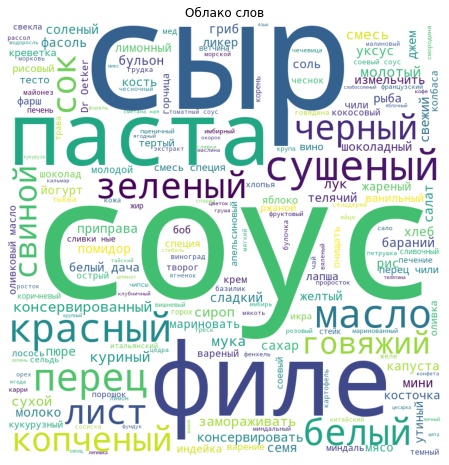

In [46]:
# строим облако из слов
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(final)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов')
plt.show()

# Семантические модели

In [76]:
group_ingr = my_file.groupby("name").agg({"ingredient": set})
ingr_for_each = list(ingr['ingredient'].values)
for i in ingr_for_each:
    ij = list(i)
    for j in range(len(ij)):
        ij[j] = ij[j].lower()
    for u in range(len(ij)):
        ij[u] = ij[u].replace(' ','')
        full_sent = ' '.join(ij)
        
    with open('forw2.txt', 'a', encoding='utf-8') as f:
        f.write(full_sent)
        f.write('\n')

In [78]:
doc = 'forw2.txt'
data = gensim.models.word2vec.LineSentence(doc)

In [80]:
model_recipes = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=5, epochs=50)

In [83]:
model_recipes.wv.most_similar("ванильноемороженое", topn=10)

[('шоколадныйпудинг', 0.7534142732620239),
 ('печенье', 0.7372556924819946),
 ('консервированноеманго', 0.7237857580184937),
 ('nutella®', 0.7175168991088867),
 ('мятнаякарамель', 0.6980790495872498),
 ('вяленаяклюква', 0.689477801322937),
 ('кирш', 0.6794897317886353),
 ('ванильныййогурт', 0.6716436147689819),
 ('песочноепеченье', 0.6689956784248352),
 ('ванильныйсахар', 0.6557486057281494)]

In [85]:
model_recipes.wv.doesnt_match("курица ванильноемороженое перец".split())

'ванильноемороженое'